In [ ]:
from google.colab import auth

In [ ]:
auth.authenticate_user()

In [ ]:
cd "/content/drive/MyDrive/kaggle/emotion"

/content/drive/MyDrive/kaggle/emotion


In [ ]:
#!unzip -qq "/content/drive/MyDrive/kaggle/emotion/archive (1).zip"

replace README.md? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
data_path = '/content/drive/MyDrive/kaggle/'

In [ ]:
import os
print(os.listdir(data_path))

['archive.zip', 'test', 'train', 'emotion', 'label.npy', 'image.npy', 'Untitled0.ipynb']


In [ ]:
train_path = data_path + "train"
test_path = data_path + "test"

In [ ]:
import matplotlib.pyplot as plt
def plot_images(img_dir, top=10):
    all_img_dirs = os.listdir(img_dir)
    img_files = [os.path.join(img_dir, file) for file in all_img_dirs][:5]
  
    plt.figure(figsize=(10, 10))
  
    for idx, img_path in enumerate(img_files):
        plt.subplot(5, 5, idx+1)
    
        img = plt.imread(img_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='gray') 

In [ ]:
import os

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras import models, layers, regularizers

In [ ]:
emotion_labels = sorted(os.listdir(train_path))
print(emotion_labels)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [ ]:
batch_size = 64
target_size = (48,48)

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen   = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=target_size,
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical',
        shuffle=True)

test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=target_size,
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
input_shape = (48,48,1)
num_classes = 7

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape, data_format='channels_last', 
                        kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 64)        36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 46, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 23, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 23, 23, 128)       5

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [ ]:
num_epochs = 100
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_TEST   = test_generator.n//test_generator.batch_size

In [ ]:
history = model.fit(train_generator, )

In [ ]:
history = model.fit_generator(train_generator, steps_per_epoch=STEP_SIZE_TRAIN, epochs=num_epochs, verbose=1, validation_data=test_generator, validation_steps=STEP_SIZE_TEST)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
448/448 [==============================] - 7073s 16s/step - loss: 2.0009 - accuracy: 0.2094 - val_loss: 1.8290 - val_accuracy: 0.2473
Epoch 2/100
448/448 [==============================] - 69s 154ms/step - loss: 1.8406 - accuracy: 0.2417 - val_loss: 1.8241 - val_accuracy: 0.2469
Epoch 3/100
448/448 [==============================] - 69s 154ms/step - loss: 1.8078 - accuracy: 0.2543 - val_loss: 1.7748 - val_accuracy: 0.2673
Epoch 4/100
448/448 [==============================] - 68s 151ms/step - loss: 1.7267 - accuracy: 0.3038 - val_loss: 1.6108 - val_accuracy: 0.3555
Epoch 5/100
448/448 [==============================] - 69s 154ms/step - loss: 1.6227 - accuracy: 0.3586 - val_loss: 1.5594 - val_accuracy: 0.3909
Epoch 6/100
448/448 [==============================] - 68s 152ms/step - loss: 1.5401 - accuracy: 0.3931 - val_loss: 1.4804 - val_accuracy: 0.3986
Epoch 7/100
448/448 [==============================] - 68s 151ms/step - loss: 1.4805 - accuracy: 0.4146 - val_loss: 1.3931 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


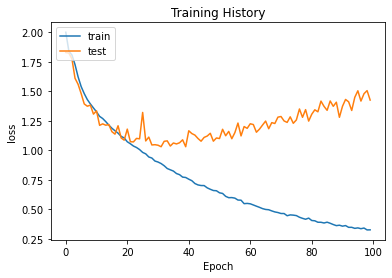

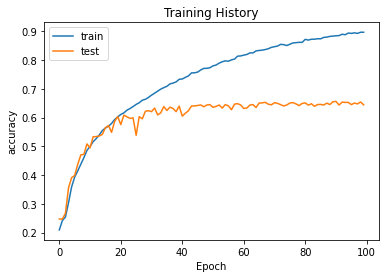

In [ ]:
keys=history.history.keys()
print(keys)
i = '1'
def show_train_history(hisData,train,test): 
    plt.plot(hisData.history[train])
    plt.plot(hisData.history[test])
    plt.title('Training History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    
    a = i
    plt.savefig(fname = a,dpi = 200)
    plt.show()
    

show_train_history(history, 'loss', 'val_loss')
i = i +'1'
show_train_history(history, 'accuracy', 'val_accuracy')

In [ ]:
score = model.evaluate_generator(test_generator, steps=STEP_SIZE_TEST) 
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Test loss:  1.4248321056365967
Test accuracy:  0.6442522406578064
